In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action="ignore")

import os

In [2]:
def load_titanic_data(filename):
    csv_path = os.path.join(filename)
    return pd.read_csv(csv_path)

In [3]:
train = load_titanic_data("train.csv")
test = load_titanic_data("test.csv")
test2 = load_titanic_data("test.csv")
titanic = pd.concat([train, test], sort = False)
len_train = train.shape[0]

In [4]:
titanic.dtypes.sort_values()

PassengerId      int64
Pclass           int64
SibSp            int64
Parch            int64
Survived       float64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.select_dtypes(include='int').head()

""
0
1
2
3
4


In [6]:
titanic.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [7]:
titanic.select_dtypes(include='float').head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [8]:
titanic.isnull().sum()[titanic.isnull().sum()>0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [9]:
train.Age=train.Age.fillna(train.Age.mean())
test.Age=test.Age.fillna(train.Age.mean())

train.Fare=train.Fare.fillna(train.Fare.mean())
test.Fare=test.Fare.fillna(train.Fare.mean())

train.Cabin=train.Cabin.fillna("unknow")
test.Cabin=test.Cabin.fillna("unknow")

train.Embarked=train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked=test.Embarked.fillna(train.Embarked.mode()[0])

In [10]:
train.drop(['PassengerId','Name'],axis=1,inplace=True)
test.drop(['PassengerId','Name'],axis=1,inplace=True)

In [11]:


titanic=pd.concat([train, test], sort=False)
titanic=pd.get_dummies(titanic)
train=titanic[:len_train]
test=titanic[len_train:]



In [12]:
train.Survived=train.Survived.astype('int')

In [13]:
xtrain=train.drop("Survived",axis=1)
ytrain=train['Survived']
xtest=test.drop("Survived", axis=1)

In [14]:
RF=RandomForestClassifier(random_state=1)
scores_rf1=cross_val_score(RF,xtrain,ytrain,scoring='accuracy',cv=5)
np.mean(scores_rf1)

0.8227147298714407

In [15]:
RF.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

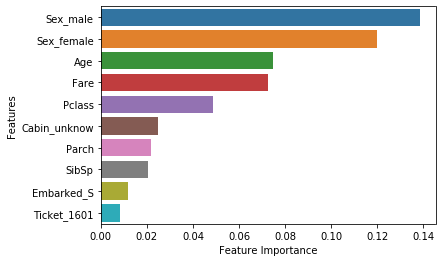

In [16]:
importances=RF.feature_importances_
feature_importances=pd.Series(importances, index=xtrain.columns).sort_values(ascending=False)
sns.barplot(x= feature_importances[0:10] , y= feature_importances.index[0:10])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
#increasing the number of trees
RF2=RandomForestClassifier(random_state=1, n_estimators= 100000)
RF2.fit(xtrain, ytrain)
pred=RF2.predict(xtest)
output=pd.DataFrame({'PassengerId':test2['PassengerId'],'Survived':pred})
output.to_csv('submission2.csv', index=False)